# 3 - Listas e mapas


Vamos também gerar algumas listas como parte de nossa análise de dados. Afinal, temos 96 gráficos, e precisamos extrair as principais informações dos dados. As listas que faremos serão:

- Atendimento (matrícula) absoluto por tempo.
- Atendimento (matrícula) relativo (relação à população) por tempo.
- Fila (demanda) absoluto por tempo.
- Fila (demanda) relativo por tempo.
- Variação entre junho de 2016 e dezembro de 2017 do atendimento absoluto.
- Variação entre junho de 2016 e dezembro de 2017 do atendimento relativo.

Essas listas vão ajudar na exibição de mapas por trimestre.

## Lista do atendimento absoluto por tempo

Para essa lista, será gerado um arquivo .csv para cada período de referência (trimestre) com os distritos ordenados pelo número de matrículas.

In [1]:
import pandas as pd

dados_educ_pop = pd.read_csv('dados/dados_educ_pop.csv', sep = ',')

# Gerando os arquivos
for periodo in dados_educ_pop.MES_ANO_REF.unique():
    dados = dados_educ_pop[dados_educ_pop['MES_ANO_REF'] == periodo]
    atendimento_absoluto = dados.sort_values(by='MAT_CRECHE', ascending=False)
    atendimento_absoluto = atendimento_absoluto[['DISTRITO', 'MAT_CRECHE']] 
    atendimento_absoluto.to_csv('resultados/atendimento_absoluto/atendimento_absoluto_' + periodo + '.csv', encoding='utf-8', index=False)

Gerando os gráficos de calor.

<Figure size 6400x4800 with 0 Axes>

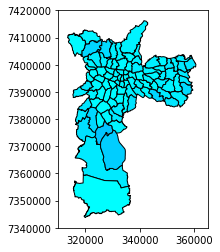

In [92]:
import shapefile as shp
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=400, facecolor='w', edgecolor='k')

dados_educ_jun_2006 = pd.read_csv('resultados/atendimento_absoluto/atendimento_absoluto_dez-06.csv', sep = ',')
maxrec = dados_educ_jun_2006.at[0, "MAT_CRECHE"]
minrec = dados_educ_jun_2006.at[95, "MAT_CRECHE"]

sf = shp.Reader("dados/LAYER_DISTRITO/DEINFO_DISTRITO.shp")

plt.figure()
ax = plt.axes()
ax.set_aspect('equal')
for shapeRec in sf.iterShapeRecords():

    shape = shapeRec.shape
    rec = shapeRec.record
    
    nome = rec[3].split(" ")
    if 'JD' in nome:
        nome[0] = "JARDIM"
    if 'CID' in nome:
        nome[0] = "CIDADE"
    rec[3] = " ".join(nome)
    
    dado = dados_educ_jun_2006[dados_educ_jun_2006['DISTRITO'] == rec[3]]
    mat = int(dado['MAT_CRECHE'].values)

    R = 0
    G = 1 - ((mat)/(13000))
    B = 1

    polygon = Polygon(shape.points)
    patch = PolygonPatch(polygon, facecolor=[R,G,B], edgecolor=[0,0,0], alpha=1.0, zorder=2)
    ax.add_patch(patch)
    
plt.ylim(7340000,7420000)
plt.xlim(310000,365000)
plt.show()

## Lista do atendimento relativo por tempo

Para essa lista, será gerado um arquivo .csv para cada período de referência (trimestre) com os distritos ordenados pelo quociente matrículas por total populacional.

In [2]:
dados_educ_pop['ATEND_REL'] = dados_educ_pop['MAT_CRECHE'] / dados_educ_pop['TOTAL']

for periodo in dados_educ_pop.MES_ANO_REF.unique():
    dados = dados_educ_pop[dados_educ_pop['MES_ANO_REF'] == periodo]
    atendimento_relativo = dados.sort_values(by='ATEND_REL', ascending=False)
    atendimento_relativo = atendimento_relativo[['DISTRITO', 'ATEND_REL']] 
    atendimento_relativo.to_csv('resultados/atendimento_relativo/atendimento_relativo_' + periodo + '.csv', encoding='utf-8', index=False)

## Lista da fila absoluta por tempo

Para essa lista, será gerado um arquivo .csv para cada período de referência (trimestre) com os distritos ordenados pelo número de crianças na fila.

In [3]:
# Gerando os arquivos
for periodo in dados_educ_pop.MES_ANO_REF.unique():
    dados = dados_educ_pop[dados_educ_pop['MES_ANO_REF'] == periodo]
    fila_absoluta = dados.sort_values(by='DEM_CRECHE', ascending=False)
    fila_absoluta = fila_absoluta[['DISTRITO', 'DEM_CRECHE']] 
    fila_absoluta.to_csv('resultados/fila_absoluta/fila_absoluta_' + periodo + '.csv', encoding='utf-8', index=False)

## Lista da fila relativa por tempo

Para essa lista, será gerado um arquivo .csv para cada período de referência (trimestre) com os distritos ordenados pelo quociente demanda por total populacional.

In [4]:
dados_educ_pop['FILA_REL'] = dados_educ_pop['DEM_CRECHE'] / dados_educ_pop['TOTAL']

for periodo in dados_educ_pop.MES_ANO_REF.unique():
    dados = dados_educ_pop[dados_educ_pop['MES_ANO_REF'] == periodo]
    fila_relativa = dados.sort_values(by='FILA_REL', ascending=False)
    fila_relativa = fila_relativa[['DISTRITO', 'FILA_REL']] 
    fila_relativa.to_csv('resultados/fila_relativa/fila_relativa_' + periodo + '.csv', encoding='utf-8', index=False)

## Lista da evolução absoluta do número de matrículas

Essa lista trará a variação, do número de matrículas, de junho de 2006 a dezembro de 2017. A última coluna trará a variação percentual desses valores.

In [5]:
dados_matricula = dados_educ_pop[['DISTRITO', 'MAT_CRECHE', 'MES_ANO_REF']]
dados_jun_2006 = dados_matricula[dados_matricula['MES_ANO_REF'] == 'jun-06']
dados_jun_2006.columns = ['DISTRITO', 'MAT_JUN_06', 'MES_ANO_REF']
dados_dez_2017 = dados_matricula[dados_matricula['MES_ANO_REF'] == 'dez-17']
dados_dez_2017.columns = ['DISTRITO', 'MAT_DEZ_17', 'MES_ANO_REF']

dados_matricula = dados_jun_2006.merge(dados_dez_2017, on = ['DISTRITO'])
dados_matricula = dados_matricula[['DISTRITO', 'MAT_JUN_06', 'MAT_DEZ_17']]

dados_matricula['EV_ABS_NUM'] = dados_matricula['MAT_DEZ_17'] - dados_matricula['MAT_JUN_06']
dados_matricula['EV_ABS_PC'] = dados_matricula['MAT_DEZ_17'] / dados_matricula['MAT_JUN_06']
# dados_matricula.sort_values(by='EV_ABS_NUM', ascending=False)
# dados_matricula.sort_values(by='EV_ABS_PC', ascending=False)

,DISTRITO,MAT_JUN_06,MAT_DEZ_17,EV_ABS_NUM,EV_ABS_PC
29,GRAJAU,2555.0,12486.0,9931.0,4.886888
24,CIDADE TIRADENTES,1676.0,11423.0,9747.0,6.815632
10,BRASILANDIA,2121.0,11488.0,9367.0,5.416313
34,ITAIM PAULISTA,1284.0,9897.0,8613.0,7.707944
46,LAJEADO,947.0,9361.0,8414.0,9.884900
41,JARDIM ANGELA,1683.0,9408.0,7725.0,5.590018
18,CAPAO REDONDO,902.0,8456.0,7554.0,9.374723
44,JARDIM SAO LUIS,1847.0,9257.0,7410.0,5.011911
35,ITAQUERA,843.0,7211.0,6368.0,8.553974
40,JARAGUA,2008.0,7870.0,5862.0,3.919323


## Lista da evolução absoluta da demanda

Essa lista trará a variação, em número de crianças, de junho de 2006 a dezembro de 2017. A última coluna trará a variação percentual desses valores.

In [6]:
dados_demanda = dados_educ_pop[['DISTRITO', 'DEM_CRECHE', 'MES_ANO_REF']]
dados_jun_2006 = dados_demanda[dados_demanda['MES_ANO_REF'] == 'jun-06']
dados_jun_2006.columns = ['DISTRITO', 'DEM_JUN_06', 'MES_ANO_REF']
dados_dez_2017 = dados_demanda[dados_demanda['MES_ANO_REF'] == 'dez-17']
dados_dez_2017.columns = ['DISTRITO', 'DEM_DEZ_17', 'MES_ANO_REF']

dados_demanda = dados_jun_2006.merge(dados_dez_2017, on = ['DISTRITO'])
dados_demanda = dados_demanda[['DISTRITO', 'DEM_JUN_06', 'DEM_DEZ_17']]

dados_demanda['EV_ABS_NUM'] = dados_demanda['DEM_DEZ_17'] - dados_demanda['DEM_JUN_06']
dados_demanda['EV_ABS_PC'] = dados_demanda['DEM_DEZ_17'] / dados_demanda['DEM_JUN_06']
# dados_demanda.sort_values(by='EV_ABS_NUM', ascending=True)
# dados_demanda.sort_values(by='EV_ABS_PC', ascending=True)

,DISTRITO,DEM_JUN_06,DEM_DEZ_17,EV_ABS_NUM,EV_ABS_PC
68,SACOMA,2203.0,347.0,-1856.0,0.157512
29,GRAJAU,3914.0,2269.0,-1645.0,0.579714
36,JABAQUARA,2279.0,708.0,-1571.0,0.310663
46,LAJEADO,1611.0,101.0,-1510.0,0.062694
10,BRASILANDIA,2392.0,914.0,-1478.0,0.382107
34,ITAIM PAULISTA,1963.0,512.0,-1451.0,0.260825
24,CIDADE TIRADENTES,1559.0,178.0,-1381.0,0.114176
44,JARDIM SAO LUIS,3674.0,2370.0,-1304.0,0.645073
16,CAMPO LIMPO,3051.0,1750.0,-1301.0,0.573582
21,CIDADE ADEMAR,3214.0,2009.0,-1205.0,0.625078
